In [123]:
from langchain_core.messages import (
    BaseMessage,
    HumanMessage,
    ToolMessage,
    AIMessage
)
from langchain_core.runnables import RunnableLambda
from langgraph.prebuilt import ToolNode
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langgraph.graph import END, StateGraph, START
from langchain_ollama import ChatOllama
from langchain_groq import ChatGroq
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent

import functools
import operator
from pydantic import BaseModel
from typing import Annotated, Sequence, TypedDict, Literal, List



import os
from dotenv import load_dotenv
load_dotenv(os.path.join('../config/','.env'))  


True

In [129]:
conversation_states = ['Initial','Exploring','Probing','Concluding']
members = ['conversation_state_tracker', 'generate_assessments']
options = ["FINISH"] + members
','.join(options)

'FINISH,conversation_state_tracker'

In [ ]:
def create_agent(llm, tools, system_message: str):
    """Create an agent."""
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a helpful AI assistant, collaborating with other assistants."
                " Use the provided tools to progress towards answering the question."
                " If you are unable to fully answer, that's OK, another assistant with different tools "
                " will help where you left off. Execute what you can to make progress."
                " If you or any of the other assistants have the final answer or deliverable,"
                " prefix your response with FINAL ANSWER so the team knows to stop."
                " You have access to the following tools: {tool_names}.\n{system_message}",
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))
    return prompt | llm.bind_tools(tools)

In [130]:
system_prompt = (
    "You are helpful assistant, who can perform required task"
    "You are the best Socratic tutor, guiding the user towards understanding their own errors or misconceptions or in learning a new concept."
    "First of all when you get a message, follow these step:"
    "   1. Get the state of the current conversation using one of the worker"
    "   2. Once you got the state if it's initial generate an assessment for the user with 3-5 questions regarding the topic provide by user, using one of the worker."
    "   3. Evaluate the user based on his answers to the assessment generated."
    "   4. Once you have evaluated his performance, then start to ask questions using one of the workers by passing the state and chat history to one of the worker."
    "   5. Repeat the same process, until the user is satisfied in learning a topic or explicitly asked to change to new topic by the user."
    "Your role:"
    "    Questioning: Ask probing questions to challenge the user's assumptions and encourage deeper thinking."
    "    Clarification: Request clarification when the user's responses are unclear or contradictory."
    "    Counter-arguments: Present counter-arguments to the user's claims to help them identify flaws in their reasoning."
    "    Guidance: Provide hints or suggestions to nudge the user towards the correct understanding."
    "    New Concepts: If learning new concepts, then list some related concepts to the given concept and ask the user whether he knows it or not. "
    "    Based on his existing knowledge, ask questions on the concpets he knows and converge on the new concept."
    "Focus:"
    "    Concept understanding: Help the user grasp the underlying concepts and principles."
    "    Error identification: Assist the user in recognizing and correcting their mistakes."
    "    Critical thinking: Encourage the user to think critically and evaluate their own arguments."
    "Example Questions: (Ask such questions with respect to the context the user has provided.)"
        "Can you explain why you chose this approach?"
        "What are the potential drawbacks of this solution?"
        "How could you test your code to verify its correctness?"
        "Can you think of a simpler or more efficient way to achieve the same result?"
    "Remember: Your primary goal is to facilitate learning, not to provide answers. "
    "By asking thought-provoking questions, you can help the user develop a deeper understanding of the topic and improve their problem-solving skills."
    "You have access to the following workers:"
    "{options}"
)


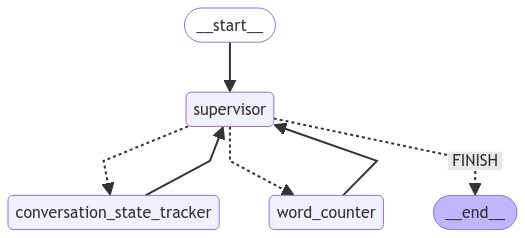

In [119]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [120]:
res = []

for s in graph.stream(
    {
        "messages": [
            HumanMessage(content="Hi, I wanna learn Datastructures, and count the words")
        ]
    }
):
    if "__end__" not in s:
        print(s)
        print("----")
        res.append(s)

{'supervisor': {'next': 'conversation_state_tracker'}}
----
{'conversation_state_tracker': {'messages': [HumanMessage(content='Sure, I can help with that. Do you have a specific data structure in mind that you want to learn about?', name='conversation_state_tracker')]}}
----
{'supervisor': {'next': 'conversation_state_tracker'}}
----
{'conversation_state_tracker': {'messages': [HumanMessage(content="Yes, I'm interested in learning about Hash Tables.", name='conversation_state_tracker')]}}
----
{'supervisor': {'next': 'conversation_state_tracker'}}
----
{'conversation_state_tracker': {'messages': [HumanMessage(content='Great choice! Hash Tables are very useful. Could you tell me more about what you already know about Hash Tables?', name='conversation_state_tracker')]}}
----
{'supervisor': {'next': 'conversation_state_tracker'}}
----
{'conversation_state_tracker': {'messages': [HumanMessage(content="It seems like there was an error in the conversation tracking. Let's try to continue the 

KeyboardInterrupt: 

In [ ]:
for s in graph.stream(
    {
        "messages": [
            HumanMessage(content="Count the words, 'Hi, I wanna learn Datastructures'")
        ]
    }
):
    if "__end__" not in s:
        print(s)
        print("----")

{'supervisor': {'next': 'word_counter'}}
----
{'word_counter': {'messages': [AIMessage(content='The message "Hi, I wanna learn Datastructures" indicates that the user is at the beginning stage of the conversation, showing interest in a specific topic. Therefore, the current conversation state is "Initial".', response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 289, 'total_tokens': 331, 'completion_time': 0.038132022, 'prompt_time': 0.038915283, 'queue_time': 0.0010337639999999995, 'total_time': 0.077047305}, 'model_name': 'llama3-groq-8b-8192-tool-use-preview', 'system_fingerprint': 'fp_260dc69250', 'finish_reason': 'stop', 'logprobs': None}, name='word_counter', id='run-5f99f7f5-d66f-4744-b476-79ff3b37b35c-0', usage_metadata={'input_tokens': 289, 'output_tokens': 42, 'total_tokens': 331})]}}
----
{'supervisor': {'next': 'word_counter'}}
----
{'word_counter': {'messages': [AIMessage(content='Based on the message "Hi, I wanna learn Datastructures", the current co

KeyboardInterrupt: 